# Sensor Based Activity Recoginition 
Challenge: cdl1 - Sensor based Activity Recognition  
Team: Lea Bütler, Manjavy Kirupa, Etienne Roulet, Si Ben Tran  

Aufgabe: 
- Bereinigung der Sensordaten
- Visualiserung der Sensordaten

Hier in diesem Notebook fuehren wir die Bereingung der aufgenommenen Sensordaten von jedem Teilnehmer der Challenge durch. Weiter visualisieren wir anschliessend die Sensordaten getrimmt und ungetrimmt. 

---

# Libraries Importieren

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sklearn.model_selection

---
# Daten einlesen

- Einlesen der Daten
- Einlesen der gefilterten Daten von 'all-sensormeasurement-plots'

In [2]:
# File: Alle_Messungen.csv einlesen 
data_raw = pd.read_csv('Alle_Messungen.csv', sep=',', index_col=0)
# convert time column to datetime
data_raw['time'] = pd.to_datetime(data_raw['time'])
# display first 5 rows of data_raw
display("data raw", data_raw.head(5))

'data raw'

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,2023-02-27 15:02:04.548,0.000,-3.552,-9.140,NaN,NaN,NaN,NaN,NaN,NaN,0.161765,-0.088290,-0.470671,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,NaN,NaN,NaN,NaN,NaN,NaN,-0.217750,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,NaN,NaN,NaN,NaN,NaN,NaN,-0.420650,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.5,-13.143750,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,NaN,NaN,NaN,NaN,NaN,NaN,-13.012501,0.0,20.587502,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


---
# NA-Werte behandeln

In [3]:
# Count of NA values per column
data_raw.isna().sum()

time                   0
Accelerometer_x    24219
Accelerometer_y    24219
Accelerometer_z    24219
Gyroscope_x         3420
Gyroscope_y         3420
Gyroscope_z         3420
Magnetometer_x     31374
Magnetometer_y     31374
Magnetometer_z     31374
Orientation_qx     31206
Orientation_qy     31206
Orientation_qz     31206
id                     0
user                   0
class                  0
id_combined            0
dtype: int64

Im ersten Schritte wurde die Anzahl der NA-Werten pro Spalte im Rohdatensatz ermittelt. Dabei ist zu sehen, dass die verschiedenen Sensoren viele NA Werte aufweisen. Beispielsweise haben alle drei Achsen des Accelerometer 24'219 NA's. In einem nächsten Schritt wird die Länge des DataFrame data_raw ermittelt und ausgegeben. Dies gibt uns einen Überblick über die Gesamtzahl der Datensätze.

In [6]:
# length of the dataframe
print('data_before_trimmed: ', len(data_raw))

# show NA values per user
data_raw[data_raw.isna().any(axis=1)].value_counts("user")

data_before_trimmed:  2759839


user
Ben_Tran        20325
Lea_Buetler     17317
Tobias_Buess     1098
dtype: int64

Im ganzen sind 2'759'839 Daten vorhanden. Weiter wurden jeweils die gesamte NA Werte auf User Basis ermittelt. Wir sehen, dass Ben und Lea viel mehr NA Werte aufweisen als Tobias. Es ist davon auszugehen, dass es an den verschiednen Handy Marken und dementsprechend ihre Sensormesser liegt. Zunächst werden die Daten nach den User gruppiert, um so jeweils die ersten id_comined anzuzeigen.

In [5]:
# group by user and show all id_combied values
print(list(data_raw.groupby("user")["id_combined"].first()))

gabo = list(data_raw.groupby("user")["id_combined"].first())[2]
print(gabo)
ben = list(data_raw.groupby("user")["id_combined"].first())[0]
print(ben)
etienne = list(data_raw.groupby("user")["id_combined"].first())[1]
print(etienne)

['01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen', '01_iPhone13pro-2023-03-21_16-55-47Etienne_RouletLaufen', '01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_TorresLaufen', '01_Huawei_Laufen-2023-03-03_19-15-46Lea_BuetlerLaufen', '01_iPhone12-2023-02-28_16-28-33Manjavy_KirupaLaufen', '01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognjen_ColovicLaufen', '01_GalaxyS21Tobias_BuessLaufen', '10_iphone13mini-2023-03-12_12-10-01Weiping_ZhangLaufen', '01_iPhone14Pro-2023-02-28_20-07-35Yvo_KellerLaufen']
01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_TorresLaufen
01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
01_iPhone13pro-2023-03-21_16-55-47Etienne_RouletLaufen


Nun werden spezifische User ausgewählt, um alle Daten von ihnen zu erhalten. Dies erfolgt indem der id_combined Wert nach dem User gefiltert wird.

In [6]:
# show data with id_combined == gabo
display(data_raw[data_raw["id_combined"] == gabo].head())

# show data with id_combined == ben
display(data_raw[data_raw["id_combined"] == ben].head())

# show data with id_combined == etienne
display(data_raw[data_raw["id_combined"] == etienne].head())

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
53408,2023-02-23 17:00:29.394,-0.144757,0.036711,0.183466,-0.018995,0.076601,-0.044259,24.735619,-7.820059,-42.659683,-0.209151,0.010802,0.246126,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53409,2023-02-23 17:00:29.404,-0.112878,0.006307,0.154997,0.006513,0.055522,-0.047334,24.719410,-7.804165,-42.499985,-0.209286,0.010388,0.246277,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53410,2023-02-23 17:00:29.414,-0.066828,0.008270,0.070211,0.021283,0.043709,-0.041569,24.669020,-7.865181,-42.141647,-0.209457,0.010104,0.246439,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53411,2023-02-23 17:00:29.424,-0.005038,-0.032582,0.041082,0.018581,0.035648,-0.034993,24.658150,-7.719778,-41.732162,-0.209622,0.009958,0.246566,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53412,2023-02-23 17:00:29.434,0.061892,-0.052410,0.031340,0.001435,0.032175,-0.032162,24.937943,-8.028658,-42.288513,-0.209718,0.009887,0.246669,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...


,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,2023-02-27 15:02:04.548,0.000,-3.552,-9.140,NaN,NaN,NaN,NaN,NaN,NaN,0.161765,-0.088290,-0.470671,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,NaN,NaN,NaN,NaN,NaN,NaN,-0.217750,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,NaN,NaN,NaN,NaN,NaN,NaN,-0.420650,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.5,-13.143750,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,NaN,NaN,NaN,NaN,NaN,NaN,-13.012501,0.0,20.587502,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
2096,2023-03-21 16:55:47.164,0.364031,-0.537604,-2.760952,0.317289,1.432462,0.534528,6.288353,-14.459913,-46.622177,-0.160815,0.071026,-0.004140,01_iPhone13pro-2023-03-21_16-55-47,Etienne_Roulet,Laufen,01_iPhone13pro-2023-03-21_16-55-47Etienne_Roul...
2097,2023-03-21 16:55:47.174,0.331170,-0.247031,-2.525733,0.346338,1.580092,0.587533,6.610100,-14.496962,-46.602837,-0.162175,0.064109,-0.007632,01_iPhone13pro-2023-03-21_16-55-47,Etienne_Roulet,Laufen,01_iPhone13pro-2023-03-21_16-55-47Etienne_Roul...
2098,2023-03-21 16:55:47.184,0.040951,-0.093142,-1.049829,0.326947,1.495050,0.570135,6.930107,-14.676899,-46.474709,-0.163560,0.057101,-0.011237,01_iPhone13pro-2023-03-21_16-55-47,Etienne_Roulet,Laufen,01_iPhone13pro-2023-03-21_16-55-47Etienne_Roul...
2099,2023-03-21 16:55:47.194,0.012263,0.150755,0.469202,0.232599,1.318114,0.498307,7.951767,-14.991495,-46.508377,-0.164697,0.050712,-0.014510,01_iPhone13pro-2023-03-21_16-55-47,Etienne_Roulet,Laufen,01_iPhone13pro-2023-03-21_16-55-47Etienne_Roul...
2100,2023-03-21 16:55:47.204,0.161909,0.497931,1.489870,0.071945,1.132906,0.436900,8.410873,-15.280138,-46.441933,-0.165217,0.045190,-0.017282,01_iPhone13pro-2023-03-21_16-55-47,Etienne_Roulet,Laufen,01_iPhone13pro-2023-03-21_16-55-47Etienne_Roul...


Auffällig ist, dass die Daten von Ben viele NA aufzeigen. Deshalb werden für unser Verständnis jeweils die ersten Reihen mit NA im nächsten Schritt ausgegeben. So verstehen wir, welche User fehlende Werte im Datensatz haben.

In [7]:
# show 5 sample rows with NA values
data_raw_na = data_raw[data_raw.isna().any(axis=1)]

# group_by id_combined and select first col
na_file_list = list(data_raw_na.groupby('id_combined').first().reset_index().id_combined)
display(na_file_list)

['01-SamsungA22-2023-02-27_14-54-28Ben_TranTreppenlaufen',
 '01_GalaxyS21Tobias_BuessLaufen',
 '01_GalaxyS21Tobias_BuessRennen',
 '01_GalaxyS21Tobias_BuessSitzen',
 '01_GalaxyS21Tobias_BuessTreppenlaufen',
 '01_GalaxyS21Tobias_BuessVelofahren',
 '01_Huawei_Fahrrad-2023-02-27_19-23-04Lea_BuetlerVelofahren',
 '01_Huawei_Laufen-2023-03-03_19-15-46Lea_BuetlerLaufen',
 '01_Huawei_Rennen-2023-03-15_17-22-07Lea_BuetlerRennen',
 '01_Huawei_Sitzen-2023-02-23_19-10-32Lea_BuetlerSitzen',
 '01_Huawei_Stehen-2023-03-01_14-27-19Lea_BuetlerStehen',
 '01_Huawei_Treppe-2023-03-01_14-59-00Lea_BuetlerTreppenlaufen',
 '01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen',
 '01_SamsungA22-2023-02-27_15-37-24Ben_TranVelofahren',
 '01_SamsungA22-2023-02-27_17-48-41Ben_TranSitzen',
 '01_SamsungA22-2023-02-28_07-17-05Ben_TranStehen',
 '01_SamsungA22-2023-03-01_17-06-47Ben_TranRennen',
 '02-SamsungA22-2023-02-27_14-57-04Ben_TranTreppenlaufen',
 '02-SamsungA22-2023-02-28_07-22-08Ben_TranStehen',
 '02_GalaxyS21Tobias

Zu guter Letzt werden diie NA-Werte i DataFrame mit 0 ersetzt. Diese werden mithilfe von fillna(0) gemacht.

In [8]:
# replace Na Values in Data with 0
data_raw = data_raw.fillna(0)

Nun wurden alle NA-Werte mit 0 ersetzt. Dadurch wird sichergestellt, dass keine fehlenden Werte mehr vorhanden sind und die Daten korrekt weiterverarbeitet werden können.

---
# Daten trimmen

In diesem Teil des Notebooks wird eine Funktion implementiert, um die Sensordaten zu trimmen. Das Ziel ist es, die ersten und letzten 5 Sekunden der Aufnahmen abzuschneiden. Dabei wurde die Wahl von 5 Sekunden aufgrund einer Vorplanung getroffen. Es wurde bei der Aufnahme der Daten festgelegt, dass jeder Benutzer zu Beginn und am Ende der Aufnahme für 5 Sekunden stillsteht.

In [9]:
# function to trim all files in all_ids
def trim_all_files(df, measurement_ids, cut_size):
    new_df = pd.DataFrame()
    for i in measurement_ids:
        file_i = df[df['id_combined'] == i].copy()
        file_i['time'] = pd.to_datetime(file_i['time'])
        time_min = file_i['time'].min()
        time_max = file_i['time'].max()
        time_min_trimmed = time_min + pd.Timedelta(seconds=cut_size)
        time_max_trimmed = time_max - pd.Timedelta(seconds=cut_size)
        file_i_trimmed = file_i[(file_i['time'] > time_min_trimmed) & (file_i['time'] < time_max_trimmed)]
        # add file to new df
        new_df = pd.concat([new_df, file_i_trimmed], axis=0)
    return new_df

# list of all unique values in id_combined
all_ids = data_raw['id_combined'].unique()

# trim all files
data_trimmed = trim_all_files(data_raw, all_ids, 5)
data_trimmed.head()

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.21775,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.42065,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,43.5,-13.143750,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,0.000,0.000,0.000,0.0,0.0,0.0,-13.012501,0.0,20.587502,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
5,2023-02-27 15:02:33.285,0.000,0.000,0.000,0.0,0.0,0.0,-22.612501,0.0,20.268751,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


Nach dem Trimmen werden die Daten in ein CSV gespeichert.

In [10]:
# export to csv
data_trimmed.to_csv('Alle_Messungen_trimmed.csv')

---
# Getrimmte Daten einlesen

In [11]:
# File: Alle_Messungen_trimmed.csv einlesen
data_trimmed = pd.read_csv('Alle_Messungen_trimmed.csv', index_col=0)
# convert time column to datetime
data_trimmed['time'] = pd.to_datetime(data_trimmed['time'])
# display first 5 rows of data_trimmed
display("data trimmed", data_trimmed.head(5))

'data trimmed'

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.21775,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.42065,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,43.5,-13.143750,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,0.000,0.000,0.000,0.0,0.0,0.0,-13.012501,0.0,20.587502,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
5,2023-02-27 15:02:33.285,0.000,0.000,0.000,0.0,0.0,0.0,-22.612501,0.0,20.268751,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


---
# Daten in 5 Sekunden Zeitfenster aggregieren

Die Idee ist, dass wir aus einer Messung ein Zeitfenster von bsp. 5 Sekunden definieren und daraus die Sensorwerten aggegrieren mittels mean, median, min, max etc... 
Stichwort: Groupby / Rolling mean


Beim Rolling Mean ist es wichtig, dass die Frequenz (Anzahl Observationen pro Sekunde) von allen Datensaetzen gleich bleibt. 

In [12]:
# filter id_combined by 9_iphone13mini-2023-03-11_13-09-56Weiping_ZhangVelofahren'
testdata = data_trimmed[data_trimmed['id_combined'] == '01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognjen_ColovicLaufen']
# display testdata'
display("Test Data", testdata.head())

# print of shape
print("Shape of Test Data: ", testdata.shape)

'Test Data'

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
123719,2023-02-25 14:17:52.861,0.245857,-0.244612,-0.610946,0.142192,0.089088,-0.064882,-22.427994,-30.804256,-37.728760,0.066913,0.297632,0.951772,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognj...
123720,2023-02-25 14:17:52.871,0.402074,-0.275943,-0.423922,0.239407,0.110246,-0.050938,-22.459976,-30.977966,-37.849854,0.066385,0.298609,0.951501,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognj...
123721,2023-02-25 14:17:52.881,0.559974,-0.330447,-0.076275,0.307556,0.084504,-0.010573,-22.368515,-31.132961,-37.538605,0.065904,0.299974,0.951109,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognj...
123722,2023-02-25 14:17:52.891,0.314691,-0.322093,0.344114,0.321166,0.034526,-0.020262,-22.341492,-31.206844,-37.751251,0.065650,0.301509,0.950645,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognj...
123723,2023-02-25 14:17:52.901,0.120378,-0.311056,0.708103,0.281128,0.050093,-0.048637,-22.167236,-31.264812,-37.399048,0.065479,0.302991,0.950186,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognj...


Shape of Test Data:  (143501, 17)


In [13]:
def calculate_rolling_stats(df, window_size_in_seconds, verbose_freq = False, agg_functions=['min', 'max', 'mean', 'median'], concat_with_original_df=False):
    '''
    This function takes a dataframe, calculates its HZ rate and
    then uses that to calculate the rolling statstics for the defined windows size in seconds.
    returns a pandas dataframe concated with the rolling stats.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to calculate the rolling statistics for.
    window_size_in_seconds : int
        The window size in seconds.
    verbose_freq : bool, optional
        If True, the function will print the HZ rate. The default is False.

    Returns
    -------
    df_with_rolling_stats : pandas.DataFrame
        The dataframe with the rolling statistics.
    '''

    # drop the index column and keep it
    df = df.reset_index()

    # Convert time column to datetime index
    df.index = pd.to_datetime(df['time'])

    # Calculate time difference between consecutive rows, using the index
    dt = df.index.to_series().diff().dropna()

    # set new index with index column 
    df = df.set_index('index')

    # Infer the sampling frequency
    freq = pd.Timedelta('1s') / dt.median() # not mean because of outliers

    if verbose_freq:
        print("{:.2f} samples per seconds, which means {:.2f} Hz,".format(freq, freq))

    # Calculate the number of samples in the specified window size
    num_samples = int(window_size_in_seconds * freq)

    # filter for numerical columns before we aggregate
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]

    # Calculate the rolling statistics
    rolling_stats = df_numeric.rolling(window=num_samples).agg(agg_functions)
    rolling_stats.columns = rolling_stats.columns.map('_'.join)
    
    if concat_with_original_df:
        # Concatenate the rolling statistics with the original DataFrame
        df_with_rolling_stats = pd.concat([df, rolling_stats], axis=1)
    else:
        # drop na rows 
        rolling_stats = rolling_stats.dropna()
    
        df_with_rolling_stats = rolling_stats

    return df_with_rolling_stats

In [14]:
# call the function with the datatest dataframe
calculate_rolling_stats(testdata, window_size_in_seconds=5, verbose_freq=True, concat_with_original_df=True)

100.00 samples per seconds, which means 100.00 Hz,


,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,...,Orientation_qx_mean,Orientation_qx_median,Orientation_qy_min,Orientation_qy_max,Orientation_qy_mean,Orientation_qy_median,Orientation_qz_min,Orientation_qz_max,Orientation_qz_mean,Orientation_qz_median
index,,,,,,,,,,,,,,,,,,,,,
123719,2023-02-25 14:17:52.861,0.245857,-0.244612,-0.610946,0.142192,0.089088,-0.064882,-22.427994,-30.804256,-37.728760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123720,2023-02-25 14:17:52.871,0.402074,-0.275943,-0.423922,0.239407,0.110246,-0.050938,-22.459976,-30.977966,-37.849854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123721,2023-02-25 14:17:52.881,0.559974,-0.330447,-0.076275,0.307556,0.084504,-0.010573,-22.368515,-31.132961,-37.538605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123722,2023-02-25 14:17:52.891,0.314691,-0.322093,0.344114,0.321166,0.034526,-0.020262,-22.341492,-31.206844,-37.751251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123723,2023-02-25 14:17:52.901,0.120378,-0.311056,0.708103,0.281128,0.050093,-0.048637,-22.167236,-31.264812,-37.399048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267215,2023-02-25 14:41:49.220,-0.046901,0.404446,-0.586288,-0.762845,0.573988,0.729486,-10.940460,-34.376259,-12.137512,...,0.582945,0.677291,-0.338638,0.327703,-0.041190,-0.087304,0.380585,0.875095,0.625076,0.573569
267216,2023-02-25 14:41:49.230,0.086672,0.638244,-0.808785,-0.766600,0.919351,0.880557,-11.204910,-34.526787,-12.501556,...,0.581915,0.677243,-0.338638,0.327703,-0.040893,-0.087304,0.380585,0.875095,0.625843,0.573889
267217,2023-02-25 14:41:49.240,0.299090,0.661232,-0.925513,-0.473973,1.457123,0.982194,-11.567795,-34.295078,-13.018036,...,0.580861,0.676083,-0.338638,0.327703,-0.040606,-0.087304,0.380585,0.875095,0.626644,0.574148


In [15]:
# create function for exporting data to csv
def export_aggregated_df(df_trimmed, windows_size = 5, concat_original=False, export_csv=True):

    # create empty dataframe
    data_trimmed_aggregated = pd.DataFrame()

    # get all unique files
    all_files = df_trimmed['id_combined'].unique()

    # iterate thorugh every file and calculate the rolling stats
    for file in tqdm(all_files):

        # filter data_trimmed by file
        data_trimmed_filtered = data_trimmed[data_trimmed['id_combined'] == file]

        # check lenght of dataframe, if 0 skip the file and continue with the next file
        if len(data_trimmed_filtered) == 0:
            continue
        
        # call calculate_rolling_stats function
        data_trimmed_filtered = calculate_rolling_stats(data_trimmed_filtered, window_size_in_seconds=windows_size, verbose_freq = False, concat_with_original_df=concat_original)

        # concat to data_trimmed_aggeraged
        data_trimmed_aggregated = pd.concat([data_trimmed_aggregated, data_trimmed_filtered], axis = 0)

    if export_csv:
        # define file name 
        file_name = 'data_trimmed_aggregated_windows_size_' + str(windows_size) + 's.csv'
        # export to csv
        data_trimmed_aggregated.to_csv(file_name, index=False)
    
    else:
        return data_trimmed_aggregated

In [16]:
# Aggregate data_trimmed with windows size of 5 seconds
data_trimmed_aggregated = export_aggregated_df(data_trimmed, windows_size = 5, concat_original=True, export_csv=True)

# display data_trimmed_aggregated
display("Data Trimmed Aggregated", data_trimmed_aggregated)

# Code laeuft ca. 5 Minuten

100%|██████████| 293/293 [02:02<00:00,  2.40it/s]


'Data Trimmed Aggregated'

None

In [17]:
# read in data_trimmed_aggregated_windows_size_5s.csv (Einlesen dauert ca. 40 Sek)
df_agg = pd.read_csv('data_trimmed_aggregated_windows_size_5s.csv')

# display df_agg
display("Data Trimmed Aggregated", df_agg)


'Data Trimmed Aggregated'

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,...,Orientation_qx_mean,Orientation_qx_median,Orientation_qy_min,Orientation_qy_max,Orientation_qy_mean,Orientation_qy_median,Orientation_qz_min,Orientation_qz_max,Orientation_qz_mean,Orientation_qz_median
0,2023-02-27 15:02:17.156,0.000000,9.722000,1.278000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-27 15:02:31.574,-0.728000,9.779000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.319200,-0.319200,-0.719579,0.568356,-0.075612,-0.075612,-0.598058,0.631111,0.016527,0.016527
2,2023-02-27 15:02:16.685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.500000,-13.143750,...,-0.210325,-0.210325,0.000000,0.568356,0.284178,0.284178,-0.598058,0.000000,-0.299029,-0.299029
3,2023-02-27 15:02:32.295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.012501,0.000000,20.587502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2023-02-27 15:02:33.285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-22.612501,0.000000,20.268751,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344483,2023-03-11 13:11:56.901,2.507094,4.691251,-0.583939,0.246416,0.067954,0.365369,-4.043274,6.146469,44.221630,...,0.864198,0.870878,-0.029589,0.248620,0.122706,0.132622,0.282121,0.556093,0.450704,0.453745
2344484,2023-03-11 13:11:56.911,1.888469,3.766656,-0.826295,0.196101,0.019053,0.352243,-3.925354,6.195618,44.229263,...,0.864512,0.871409,-0.028672,0.248620,0.122759,0.132622,0.282121,0.556093,0.450169,0.452909
2344485,2023-03-11 13:11:56.921,0.994240,3.075035,-0.740944,0.105015,-0.027495,0.306060,-3.801758,6.023056,43.900330,...,0.864825,0.871541,-0.027644,0.248620,0.122807,0.132622,0.282121,0.556093,0.449634,0.452068
2344486,2023-03-11 13:11:56.931,0.423654,2.433349,-0.432823,-0.027677,0.027132,0.250502,-3.830048,6.086670,43.879021,...,0.865135,0.871599,-0.026602,0.248620,0.122851,0.132622,0.282121,0.556093,0.449100,0.449976


---

# Preprocessing Data for Machine Learning 

In [18]:
# Create function to splot data into train and validation sets
def preprocess_data(data, test_size=0.2, random_state=42, make_plot=False, undersample=False, oversample=False):

    # Split data into train and validation sets using GroupShuffleSplit
    df_train_idx, df_val_idx = next(iter(sklearn.model_selection.GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state).split(data, groups=data['id_combined'])))
    df_train_ = data.iloc[df_train_idx]
    df_val_ = data.iloc[df_val_idx]

    # Undersample if specified, else oversample if specified, else keep original dataset
    if undersample and not oversample:
        print("undersample dataset")
        df_train = df_train_.groupby('class').sample(n = df_train_['class'].value_counts().min(), random_state=random_state)
        df_val = df_val_.groupby('class').sample(n = df_val_['class'].value_counts().min(), random_state=random_state)
    elif oversample and not undersample:
        print("oversample dataset")
        df_train = df_train_.groupby('class').sample(n = df_train_['class'].value_counts().max(), replace=True, random_state=random_state)
        df_val = df_val_.groupby('class').sample(n = df_val_['class'].value_counts().max(), replace=True, random_state=random_state)

        #df_train = df_train_.groupby('class').apply(lambda x: x.sample(df_train_['class'].value_counts().max(), replace=True, random_state=42))
        #df_val = df_val_.groupby('class').apply(lambda x: x.sample(df_val_['class'].value_counts().max(), replace=True, random_state=42))
    else:
        print("no undersampling or oversampling")
        df_train = df_train_
        df_val = df_val_

    # Plot class distribution if specified
    if make_plot:
        # create counterplot for the class distribution of train and test data
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

        # plot the class distribution of the train data
        df_train['class'].value_counts().plot(kind = "bar", ax = ax1, color = "lightblue", edgecolor = "black", linewidth = 1)
        ax1.set_xlabel("Class")
        ax1.set_ylabel("Number of Observations")
        ax1.set_title("Number of Observations per Class in Train Data")
        for p in ax1.patches:
            ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

        # plot the class distribution of the test data
        df_val['class'].value_counts().plot(kind = "bar", ax = ax2, color = "lightblue", edgecolor = "black", linewidth = 1)
        ax2.set_xlabel("Class")
        ax2.set_ylabel("Number of Observations")
        ax2.set_title("Number of Observations per Class in Validate Data")
        for p in ax2.patches:
            ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

        # set the title of the figure and optimize the layout of the subplots
        fig.suptitle("Class Distribution of Train and Validate Dataz\n undersample: " + str(undersample) + " ,oversample: " + str(oversample), fontsize = 16)
        plt.tight_layout()
        plt.show()

    # cols that should be dropped from the dataset
    cols_to_drop = ['time', 'Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x',
                    'Magnetometer_y', 'Magnetometer_z', 'Orientation_qx', 'Orientation_qy', 'Orientation_qz', 'id', 'user', 'id_combined']
    
    # Drop columns
    df_train = df_train.drop(cols_to_drop, axis=1)
    df_val = df_val.drop(cols_to_drop, axis=1)

    # drop rows with NaN Values (cause from the export_aggregated_df(concat_only=True) function, there exists rows with NaN values)
    df_train = df_train.dropna()
    df_val = df_val.dropna()

    # Creata X and y 
    y_train = df_train['class']
    X_train = df_train.drop('class', axis=1)
    y_val = df_val['class']
    X_val = df_val.drop('class', axis=1)

    # Return preprocessed data
    return X_train, y_train, X_val, y_val

oversample dataset


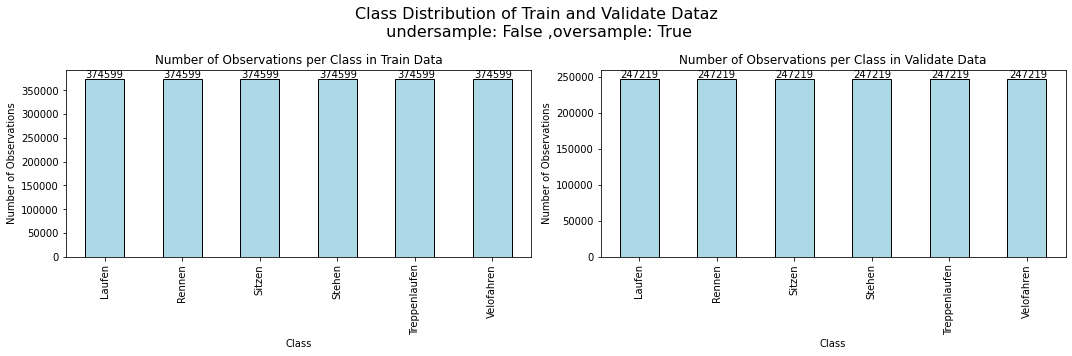

undersample dataset


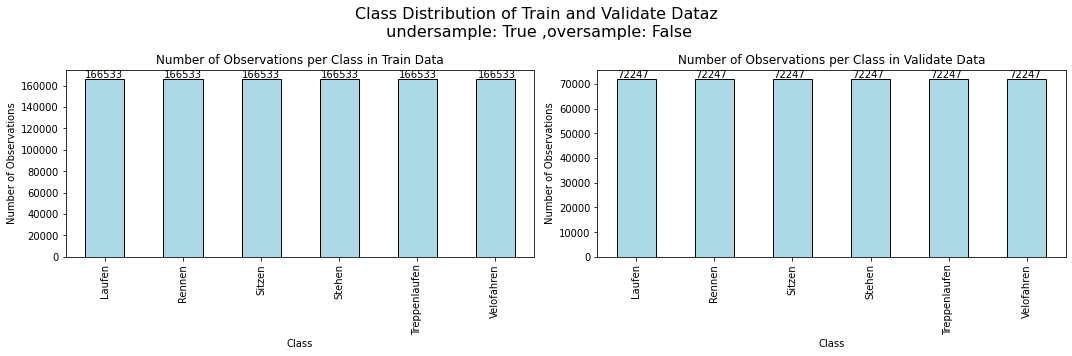

no undersampling or oversampling


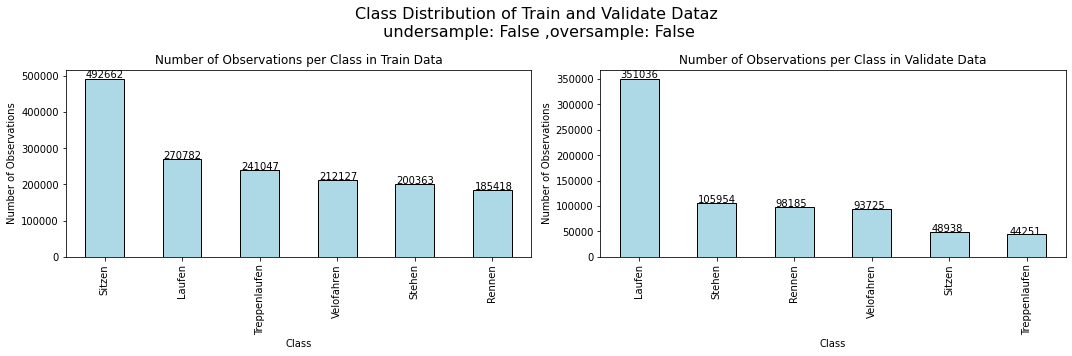

Oversample and Undersampling Data Works


In [19]:
# preprocess data function with undersampling
preprocess_data(df_agg, test_size=0.2, random_state=3, make_plot=True, undersample=False, oversample=True)
# preprocess data function with oversampling
preprocess_data(df_agg, test_size=0.3, random_state=5, make_plot=True, undersample=True, oversample=False)
# preprocess data function with no undersampling or oversampling
preprocess_data(df_agg, test_size=0.3, random_state=7, make_plot=True, undersample=False, oversample=False)

print("Oversample and Undersampling Data Works")